# Processing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.4 MB/s 
     |████████████████████████████████| 40 kB 1.2 MB/s 
     |████████████████████████████████| 462 kB 44.1 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
%cd /content/drive/My Drive/Capstone Project/

/content/drive/My Drive/Capstone Project


In [4]:
import zipfile
import os
# Extract the archive
local_zip = './dataset_binary.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.chdir('..')
os.chdir('..')
os.chdir('..')
os.chdir('..')
zip_ref.extractall('tmp/CNN letter Dataset')
zip_ref.close()

In [5]:
import os

base_dir = 'tmp/CNN letter Dataset/'

class_0_dir = os.path.join(base_dir, '0')
class_1_dir = os.path.join(base_dir, '1')
class_O_dir = os.path.join(base_dir, 'O')

print('total training 0 images:', len(os.listdir(class_0_dir)))
print('total training 1 images:', len(os.listdir(class_1_dir)))
print('total training O images:', len(os.listdir(class_O_dir)))

class_0_files = os.listdir(class_0_dir)
print(class_0_files[:10])

class_1_files = os.listdir(class_1_dir)
print(class_1_files[:10])

class_O_files = os.listdir(class_O_dir)
print(class_O_files[:10])

total training 0 images: 1030
total training 1 images: 1030
total training O images: 32
['tes28.jpg', 'tes901.jpg', 'tes226.jpg', 'tes738.jpg', 'tes339.jpg', 'tes781.jpg', 'tes394.jpg', 'tes576.jpg', 'tes33.jpg', 'tes439.jpg']
['tes28.jpg', 'tes901.jpg', 'tes226.jpg', 'tes738.jpg', 'tes339.jpg', 'tes781.jpg', 'tes394.jpg', 'tes576.jpg', 'tes33.jpg', 'tes439.jpg']
['tes28.jpg', 'tes29.jpg', 'tes1.jpg', 'tes27.jpg', 'tes17.jpg', 'tes2.jpg', 'tes10.jpg', 'tes19.jpg', 'tes6.jpg', 'tes26.jpg']


# Model

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(75, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 10, 64)        0

In [7]:
# Set the training parameters
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Image Preprocessing

In [8]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/CNN letter Dataset"
training_datagen = ImageDataGenerator(rescale=1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.1)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(75,100),
	class_mode='sparse',
  batch_size=62,
  subset='training'
)

validation_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(75,100),
	class_mode='sparse',
  batch_size=62,
  subset='validation'
)

Found 31979 images belonging to 36 classes.
Found 3553 images belonging to 36 classes.


# Training Model

In [9]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
516/516 [==============================] - 101s 173ms/step - loss: 2.3927 - accuracy: 0.3146 - val_loss: 1.8315 - val_accuracy: 0.4706
Epoch 2/10
516/516 [==============================] - 78s 151ms/step - loss: 1.6116 - accuracy: 0.5278 - val_loss: 1.4275 - val_accuracy: 0.5851
Epoch 3/10
516/516 [==============================] - 78s 151ms/step - loss: 1.2503 - accuracy: 0.6262 - val_loss: 1.1469 - val_accuracy: 0.6693
Epoch 4/10
516/516 [==============================] - 78s 152ms/step - loss: 1.0691 - accuracy: 0.6823 - val_loss: 1.0144 - val_accuracy: 0.6958
Epoch 5/10
516/516 [==============================] - 76s 147ms/step - loss: 0.9381 - accuracy: 0.7175 - val_loss: 0.9418 - val_accuracy: 0.7104
Epoch 6/10
516/516 [==============================] - 75s 146ms/step - loss: 0.8470 - accuracy: 0.7475 - val_loss: 0.8148 - val_accuracy: 0.7605
Epoch 7/10
516/516 [==============================] - 76s 147ms/step - loss: 0.7838 - accuracy: 0.7663 - val_loss: 0.8138 - val_a

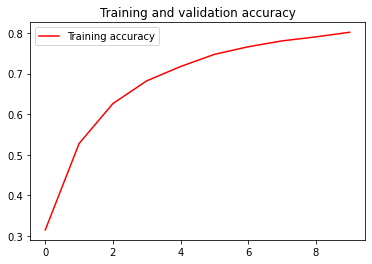

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [12]:
print(tf.__version__)

2.8.0


In [16]:
tf.saved_model.save(model, './')

INFO:tensorflow:Assets written to: ./assets


In [20]:
import time
saved_model_path = "/tmp/saved_models/{}".format(int(time.time()))

tf.keras.models.save_model(model, saved_model_path)

INFO:tensorflow:Assets written to: /tmp/saved_models/1653922181/assets


In [21]:
!tensorflowjs_converter --input_format=keras_saved_model /tmp/saved_models/1653922181 /tmp/ocr3

2022-05-30 14:50:12.140105: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(75, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  result = int(np.argmax(classes))
  dictionary = {0:'0', 1:'1', 2 :'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',
    11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K',
    21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
    30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z'}
  print(dictionary[result])

Saving test2.jpg to test2.jpg
test2.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
